## Background / Motivation


Early on in the pandemic, people had to deal with their travel plans being upended overnight. On the consumer side, we knew that the process involved the disappointment of canceling flights and hotel reservations, but we were curious about the effects on businesses like airlines and hotels. We were particularly curious about hotel booking cancellations and how these impact hotels during non-pandemic times, since we know that the impact during the pandemic was drastic.

Today, hotels tend to provide free or low-cost cancellation services for customers who cannot follow through with their bookings. However, this can become problematic for the hotel if customers abuse cancellation services and can result in a loss of profit. While hotels could address this issue by overbooking hotel rooms, they run the risk of losing business and upsetting customers if they fail to overbook the correct amount. An incorrect approach to overbooking could also result in the hotel having to book their customer a room in a different hotel, leading to an even higher cost. 

## Problem statement 


We are interested in predicting the probability of a random hotel guest cancelling their booking at an INN hotel. This is a prediction problem. We are also interested in developing a formula for the INN hotel chain to use when calculating how much they should overbook, which could help them maximize profit. 

## Data sources 


We used a dataset from Kaggle with approximately 36,000 observations and 18 variables. Each observation corresponds to a hotel booking within the INN hotel chain made in 2017 or 2018. The dataset includes information about the hotel bookings such as the length of stay, number of guests, and whether the reservations were cancelled. 

Here is the link to the dataset: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

## Stakeholders 


Our two key stakeholders are hotel managers and the INN hotel chain. Our success matters to the hotel manager because they would be able to identify the probability of a customer cancelling their reservation to navigate overbooking. Meanwhile, the INN hotel chain cares because our success would help them maximize their profit by minimizing the loss from having empty rooms across their hotels.

## Data quality check / cleaning / preparation (Hoda, Elena)

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

If the tables in this section take too much space, you may put them in the appendix, and just mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? 

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your final model(s).

The dataset consisted of 36275 observations of 18 different variables and contained no missing values as it was presumably cleaned and processed by the Kaggle contributors from where it was sourced. The response `booking_status` consisted of 67.24% not canceled and 32.76% canceled. The distribution of all 10 continuous variables are displayed below. 

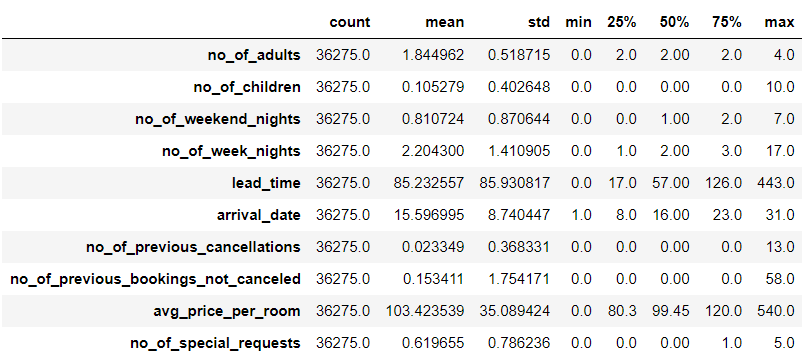

The frequency counts of all 7 categorical variables are displayed below. Non-binary categorical predictors, which included `market_segment_type`, `room_type_reserved`, `arrival_month`, and `type_of_meal_plan` were converted to dummy variables for inclusion in the various models. 

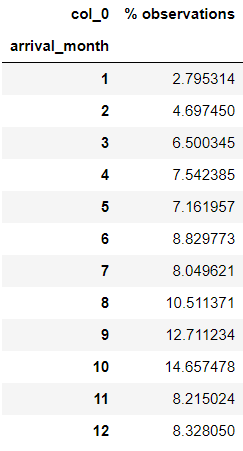 

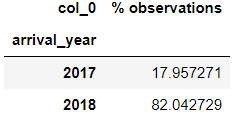

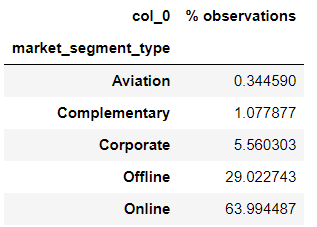

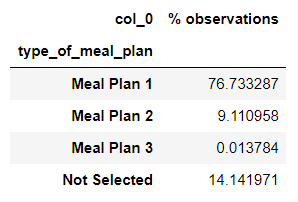

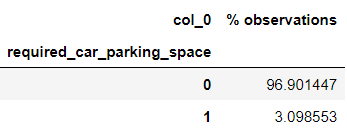

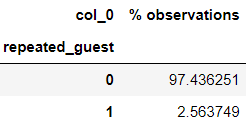

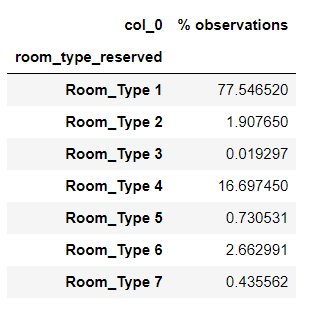

## Exploratory data analysis (Hoda, Elena)

Put the relevant EDA here (visualizations, tables, etc.) that helped you figure out useful predictors for developing the model(s). Only put the EDA that ended up being useful towards developing your final model(s). 

List the insights (as bullet points) you got from EDA that ended up being useful towards developing your final model. 

Again, if there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

- Lead time, average price per room, and number of special requests were identified as the most significant continuous predictors based on their relatively high correlations with the response. 
- Lead time and average price per room also showed different distributions among canceled versus not canceled observations. Number of weekend nights was identified as a potentially important predictor based on these visualizations as well. 
- The distribution of lead time was significantly skewed, suggesting that log transformation of the predictor would be useful in fitting the model. 
- Binned values of lead time and average price room also displayed high variance when plotted with the response, further justifying the usefulness of log transformations. 

### Identifying Significant Predictors and Their Relationships 
Correlations of lead time, average price per room, and number of special requests with the response were 0.438538, 0.142569, and -0.253070, respectively. The relationship between the response and all numeric predictors is plotted below. 

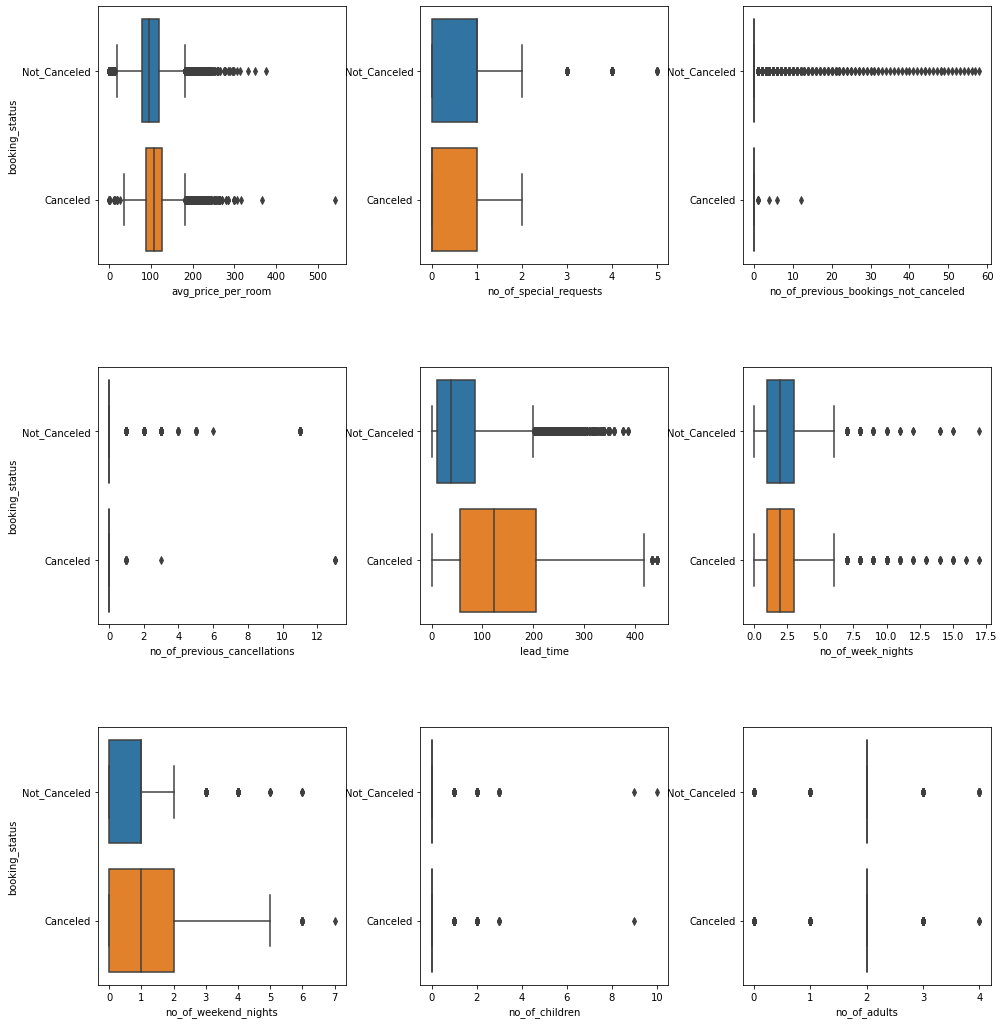

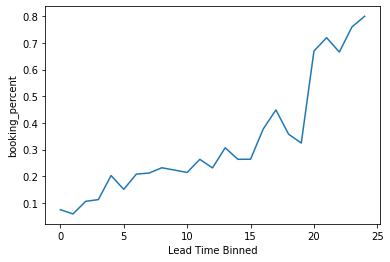

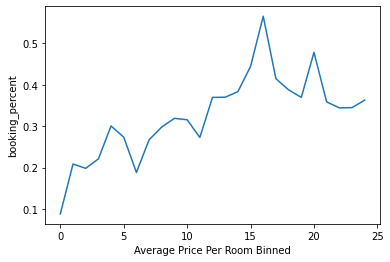

The relationship between the response and all categorical predictors are displayed below.
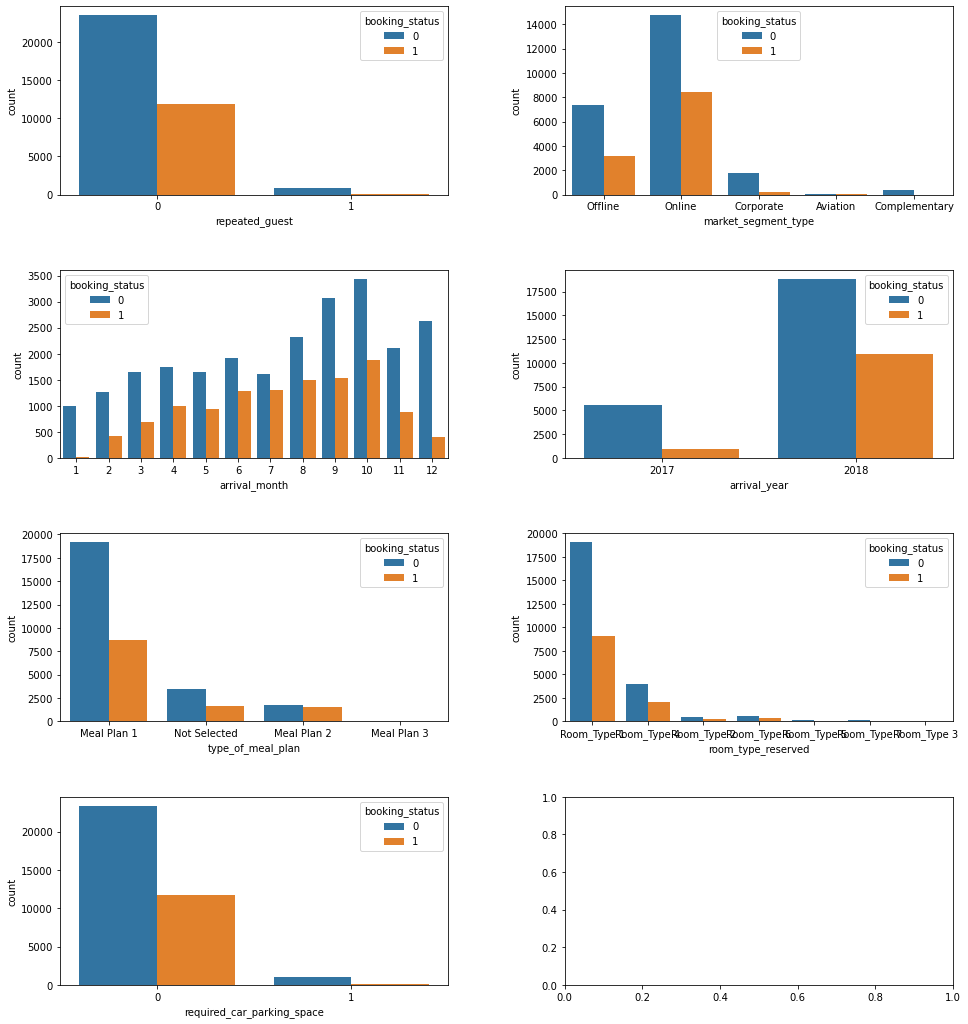

### Autocorrelation attempts

Since logistic regression does not utilize residuals, we cannot really use autocorrelation. However, there might be some correlation between month with the number of cancellation, so we attempted to look into that relationship.

First, I want to look at the different months and see number of overall booking as well as the number of cancellation for each month

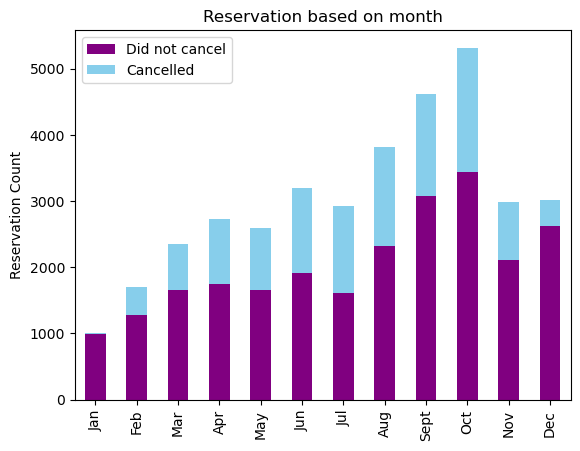

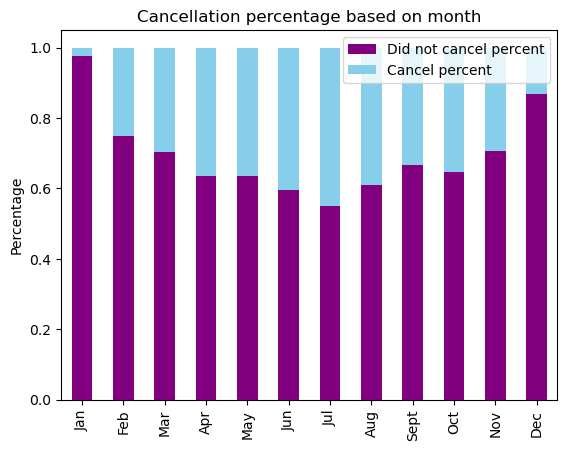

All of the months have a relatively similar rate of cancellation with the exception of January and December. July has a slightly higher rate of cancellation, but I don't think that it is too significant. Therefore, we can conclude that generally, even though there is a correlation between the totally number of reservations and the month of the year, there seems to be no correlation between the percentage of cancellation. 

## Approach (Hoda, Elena)

What kind of a model (linear / logistic / other) did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? Did the very first model you tried work? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction / inference?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

The models we developed were logistic being as this was a classification problem. Hotel guests either cancelled their hotel bookings (cancelled = 1) or did not cancel (not_cancelled = 0). We wanted to minimize primarly FNR and increase accuracy. FNR represents the rate we predict someone will not cancel their booking but they actually do and this would negatively affect our overbooking strategy. Our approach consisted of creating a baseline model, and from there try implementing new variables and variable transformations based on EDA to look for improvement. This very first baseline model we explored had a decent accuracy of 80% and an FNR of 34%, therefore we struggled in finding models that would perform better. We therefore tried adding new variables which some had issues with multicollinearity. After removing collinearty, the model performed relatively the same as the baseline model. We tried doing a model with binned and transformed variables based on trends obsereved in the EDA but still the models did not perform as well as the baseline. We then began to try other techniques including forward and backward variable selection. We used other sources [1] to apply techniques like KNN. Therefore we did use solutions on kaggle to get ideas on other approaches we could use. However, we did build upon those ideas. Finally, we also tried using lasso and ridge regression models. 


COMMENT: Hoda I think you can explain this better than I can - Elena

## Developing the model (Hoda, Elena)

Explain the steps taken to develop and improve the base model - informative visualizations / addressing modeling assumption violations / variable transformation / interactions / outlier treatment / influential points treatment / addressing over-fitting / addressing multicollinearity / variable selection - stepwise regression, lasso, ridge regression). 

Did you succeed in achieving your goal, or did you fail? Why?

**Put the final model equation**.

**Important: This section should be rigorous and thorough. Present detailed information about decision you made, why you made them, and any evidence/experimentation to back them up.**

## Limitations of the model with regard to inference / prediction

If it is inference, will the inference hold for a certain period of time, for a certain subset of population, and / or for certain conditions.

If it is prediction, then will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

It is important to note that we only had access to data from 2018 and part of 2017. 

## Developing Overbooking Formula (Luna + Kiara)

You are welcome to introduce additional sections or subsections, if required, to address any specific aspects of your project in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions and Recommendations to stakeholder(s) (Luna + Kiara)

What conclusions do you draw based on your model? If it is inference you may draw conclusions based on the coefficients, statistical significance of predictors / interactions, etc. If it is prediction, you may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

## GitHub and individual contribution {-}

**Github link**: https://github.com/LinhNgaNguyen/STAT303-2-Project

Add details of each team member's contribution in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Hoda Fakhari</td>
    <td>Data cleaning and EDA</td>
    <td>Cleaned data to impute missing values and developed visualizations to identify appropriate variable transformations.</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Elena Llaguno Cantu</td>
    <td>Assumptions and interactions</td>
    <td>Checked and addressed modeling assumptions and identified relevant variable interactions.</td>
    <td>120</td>
  </tr>
    <tr>
    <td>Luna Nguyen</td>
    <td>Outlier and influential points treatment</td>
    <td>Identified outliers/influential points and analayzed their effect on the model.</td>
    <td>130</td>    
  </tr>
    <tr>
    <td>Kiara Villalobos-Hernandez</td>
    <td>Variable selection and addressing overfitting</td>
    <td>Performed variable selection on an exhaustive set of predictors to address multicollinearity and overfitting.</td>
    <td>150</td>    
  </tr>
</table>

List the **challenges** you faced when collaborating with the team on GitHub. Are you comfortable using GitHub? 
Do you feel GitHuB made collaboration easier? If not, then why? *(Individual team members can put their opinion separately, if different from the rest of the team)*

## References {-}


[1] TKHARITONISHVILI. LG_Reg, XGB, KNN, D_Tree--max Accuracy = 0.88, 2023. Kaggle Notebook. Supplied as additional material.

[2] AHSAN RAZA. Hotel Reservations Dataset. Kaggle Dataset. Supplied as additional material.



## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.